<a href="https://colab.research.google.com/github/Qasim-Shah-73/RevoultDetectFraud/blob/main/DetectFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Adjust the file path based on the location of your dataset
transaction_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/transactions.xlsx'
users_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/users.csv'
fraudsters_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/fraudsters.csv'

In [ ]:
# Load the datasets into a pandas DataFrame
transactions = pd.read_excel(transaction_path)
users = pd.read_csv(users_path)
fraudsters = pd.read_csv(fraudsters_path)

In [ ]:
transactions.columns

Index(['ID', 'USER_ID', 'CREATED_DATE', 'TYPE', 'STATE', 'AMOUNT_GBP',
       'CURRENCY'],
      dtype='object')

In [ ]:
transactions['CURRENCY'].unique()

array(['PLN', 'RON', 'GBP', 'EUR', 'HUF', 'BGN', 'CZK', 'SEK', 'USD',
       'SGD', 'CHF', 'HRK', 'NOK', 'JPY', 'CAD', 'UAH', 'DKK', 'TRY',
       'BTC', 'PEN', 'AED', 'AUD', 'BYN', 'MYR', 'RSD', 'SCR', 'IDR',
       'HKD', 'PHP', 'MAD', 'RUB', 'ETH', 'NZD', 'ISK', 'ZAR', 'INR',
       'MXN', 'XPF', 'SAR', 'COP', 'THB', 'ALL', 'TWD', 'ILS', 'GEL',
       'MKD', 'XRP', 'BRL', 'ARS', 'KRW', 'EGP', 'CRC', 'CLP', 'VND',
       'TZS', 'BAM', 'QAR', 'BBD', 'BCH', 'KZT', 'CNY', 'LTC', 'AWG',
       'XCD', 'MUR', 'SRD', 'MDL', 'ZMW', 'BSD', 'BOB', 'GHS', 'DOP',
       'LKR', 'TND', 'MMK', 'KES', 'ETB', 'JOD', 'XOF', 'MOP', 'MGA',
       'MNT', 'OMR', 'CVE', 'GMD', 'LBP', 'MWK', 'BHD', 'NAD', 'BDT',
       'GTQ', 'PKR', 'AMD', 'NGN', 'HNL', 'JMD', 'LAK', 'BWP', 'XAF',
       'MZN', 'AZN', 'FJD', 'BND', 'BZD', 'VES', 'DZD', 'UZS', 'NPR',
       'KGS', 'MVR'], dtype=object)

In [ ]:
transactions['CURRENCY'].nunique()

110

In [ ]:
users.columns

Index(['ID', 'CREATED_DATE', 'COUNTRY', 'BIRTH_DATE'], dtype='object')

In [ ]:
users['COUNTRY'].unique()

array(['BG', 'IE', 'PL', 'FR', 'CZ', 'PT', 'LT', 'GB', 'RO', 'CH', 'ES',
       'NL', 'HU', 'SK', 'DE', 'NO', 'SE', 'DK', 'CY', 'IT', 'AT', 'IS',
       'MT', 'BE', 'LU', 'HR', 'GF', 'LV', 'JE', 'FI', 'EE', 'GR', 'SI',
       'AU', 'RE', 'MQ', 'GI', 'GG', 'PF', 'NC', 'YT', 'IM', 'GP', 'LI',
       'BM', 'SG', 'KY', 'BL', 'SX', 'VG', 'MF', 'AW', 'CW', 'GL', 'US',
       'PM', 'FK'], dtype=object)

# **Data Understanding**

---



In [ ]:
# Transaction Amounts
mean_amount = transactions['AMOUNT_GBP'].mean()
median_amount = transactions['AMOUNT_GBP'].median()
mode_amount = transactions['AMOUNT_GBP'].mode().values[0]
min_amount = transactions['AMOUNT_GBP'].min()
max_amount = transactions['AMOUNT_GBP'].max()
variance_amount = transactions['AMOUNT_GBP'].var()

# Displaying Descriptive Statistics
print(f"Mean Amount: {mean_amount}")
print(f"Median Amount: {median_amount}")
print(f"Mode Amount: {mode_amount}")
print(f"Min Amount: {min_amount}")
print(f"Max Amount: {max_amount}")
print(f"Variance of Amount: {variance_amount}")


Mean Amount: 34.098794373316174
Median Amount: 8.37
Mode Amount: 0.01
Min Amount: 0.01
Max Amount: 83250.73
Variance of Amount: 56002.65474652657


In [ ]:
users.rename(columns={'USER_ID':'ID'})
users['fraudster'] = 0
print(users.head())

                                     ID             CREATED_DATE COUNTRY  \
0  46f44852-aaa5-4634-aadd-8cc4eefef3c8  2019-04-22 18:30:30.735      BG   
1  f17dd8af-2edb-4415-a950-d90a1b5e3e5b   2019-04-15 02:44:24.94      IE   
2  55e6fcef-f573-4c54-8b27-537adc417e19   2019-04-03 16:10:44.53      PL   
3  dc03019c-9cf1-4081-a70a-6922a44fe393  2019-04-13 14:16:11.928      FR   
4  bcd967e5-c273-45a7-a7f5-e7c9e3b19b7e  2019-04-03 15:46:43.997      IE   

   BIRTH_DATE  fraudster  
0  1984-10-22          0  
1  1984-11-04          0  
2  1977-09-08          0  
3  1992-09-06          0  
4  1993-10-22          0  


In [ ]:
fraudster_user_ids = set(fraudsters['USER_ID'].values)
users.loc[users['ID'].isin(fraudster_user_ids), 'fraudster'] = 1

In [ ]:
print(users[users['fraudster'] == 1].count())

ID              757
CREATED_DATE    757
COUNTRY         757
BIRTH_DATE      757
fraudster       757
dtype: int64


In [ ]:
fraudster_user_ids = fraudsters['USER_ID'].values
transactions['fraudster'] = np.where(transactions['USER_ID'].isin(fraudster_user_ids), 1, 0)


In [ ]:
# Fill NaN values in 'fraudster' column with 0
transactions['fraudster'] = transactions['fraudster'].fillna(0).astype(int)

# Calculate value counts of 'fraudster'
fraudster_counts = transactions['fraudster'].value_counts()

# Print the value counts
print("Fraudster Value Counts:")
print(fraudster_counts)

Fraudster Value Counts:
0    1040519
1       8056
Name: fraudster, dtype: int64


 Checking Ratio of Fraudsters in dataset





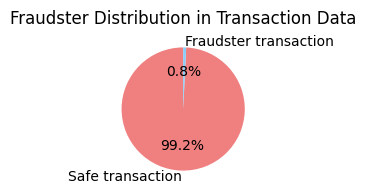

In [ ]:
 # Plotting Pie Chart for Frudsters ratio
plt.figure(figsize=(2, 2))
plt.pie(fraudster_counts, labels=['Safe transaction', 'Fraudster transaction'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraudster Distribution in Transaction Data')

plt.show()


# Basic Understanding of features of transactions and users


---


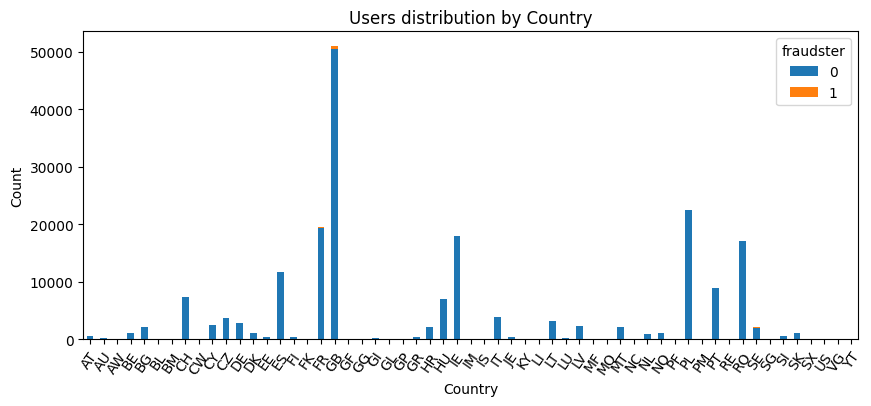

In [ ]:
# Group users by country
users_in_country = users.groupby('COUNTRY')['fraudster'].value_counts().unstack()

users_in_country.plot(figsize=(10, 4), kind='bar', title='Users distribution by Country', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()

In [ ]:
from datetime import datetime

# Age = m Current year - Birthday
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])
users['age'] = (datetime.now() - users['BIRTH_DATE']).astype('<m8[Y]')


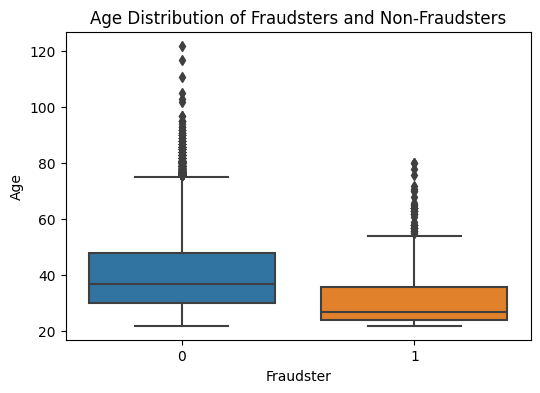

In [ ]:
 # Plotting Boxplot for Frudsters Age Distribution
plt.figure(figsize=(6, 4))
sns.boxplot(data=users, x='fraudster', y='age')
plt.xlabel('Fraudster')
plt.ylabel('Age')
plt.title('Age Distribution of Fraudsters and Non-Fraudsters')
plt.show()

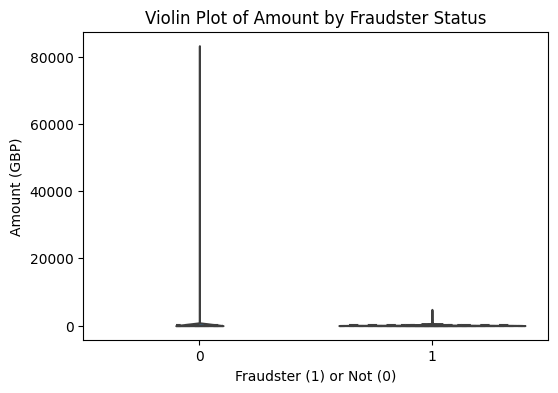

In [ ]:
#plotting scatter plot to see what amount do fraudsters and normal users see
plt.figure(figsize=(6, 4))
sns.violinplot(x='fraudster', y='AMOUNT_GBP', data=transactions, inner='quartile')
plt.title('Violin Plot of Amount by Fraudster Status')
plt.xlabel('Fraudster (1) or Not (0)')
plt.ylabel('Amount (GBP)')
plt.show()

In [ ]:
fraud_rate = round(users['fraudster'].mean() * 100, 2)
print(f"Overall fraud rate is {fraud_rate} %")


Overall fraud rate is 0.38 %


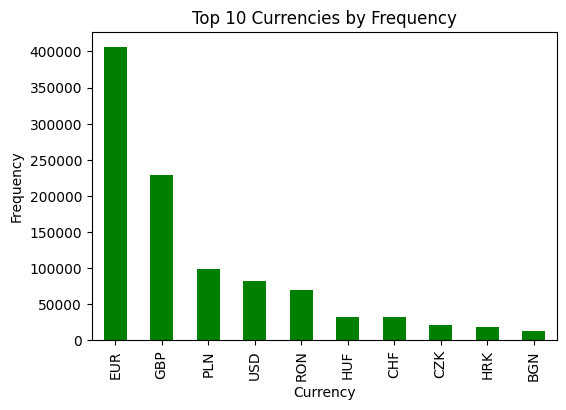

In [ ]:
#plotting top 10 currencies used
plt.figure(figsize=(6, 4))
top_currencies = transactions['CURRENCY'].value_counts().nlargest(10)
top_currencies.plot(kind='bar', color='green')
plt.title('Top 10 Currencies by Frequency')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.show()


<ipython-input-24-96206904627b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['CREATED_DATE'] = pd.to_datetime(fraudulent_transactions['CREATED_DATE'])


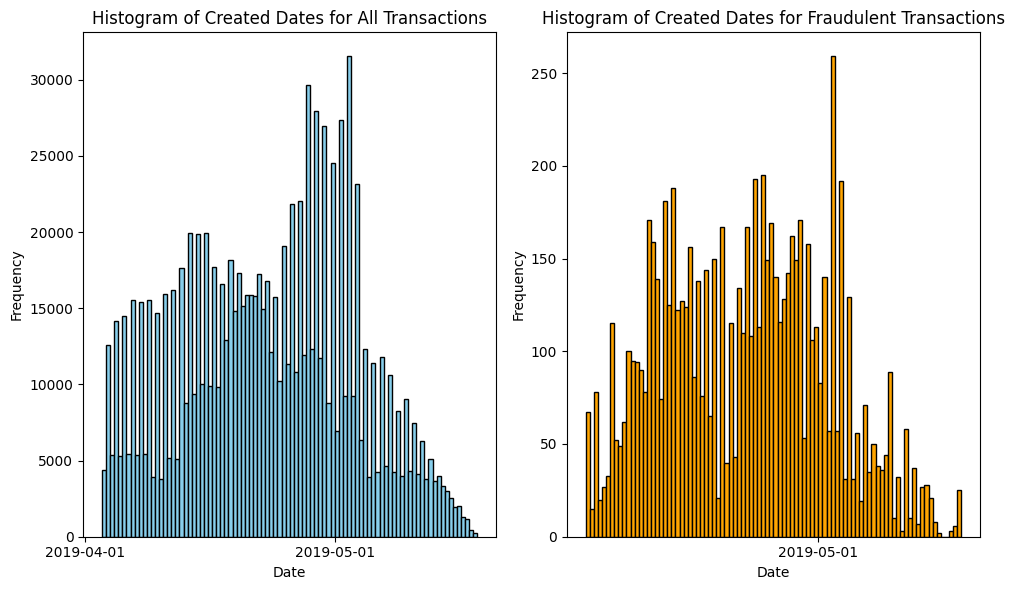

In [ ]:
import matplotlib.dates as mdates

fraudulent_transactions = transactions.loc[transactions['fraudster'] == 1]

# Convert CREATED_DATE to datetime format
transactions['CREATED_DATE'] = pd.to_datetime(transactions['CREATED_DATE'])
fraudulent_transactions['CREATED_DATE'] = pd.to_datetime(fraudulent_transactions['CREATED_DATE'])

# Plotting Histogram of Created Dates for All Transactions
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(transactions['CREATED_DATE'], bins=92, color='skyblue', edgecolor='black')
plt.title('Histogram of Created Dates for All Transactions')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Adjust x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plotting Histogram of Created Dates for Fraudulent Transactions
plt.subplot(1, 2, 2)
plt.hist(fraudulent_transactions['CREATED_DATE'], bins=92, color='orange', edgecolor='black')
plt.title('Histogram of Created Dates for Fraudulent Transactions')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Adjust x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


              count
          fraudster
AGE_GROUP          
0-9               6
20-29         48083
30-39         66513
40-49         42615
50-59         26867
60-69         12422
70-79          3311
80-89           405
90-99            28


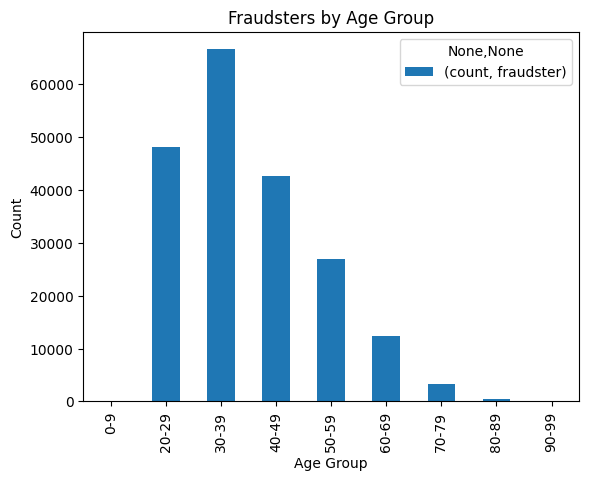

In [ ]:
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]

# Create 'AGE GROUP' column
users['AGE_GROUP'] = pd.cut(users['age'], bins=range(0, 101, 10), right=False, labels=False).fillna(0)
users['AGE_GROUP'] = [labels[int(i)] for i in users['AGE_GROUP']]

# Create a pivot table
table = pd.pivot_table(users, aggfunc=['count'], values='fraudster', index='AGE_GROUP')

print(table)

# Plotting Bar graph for Frudsters Age Group Distribution
table.plot(kind='bar', stacked=True, title='Fraudsters by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

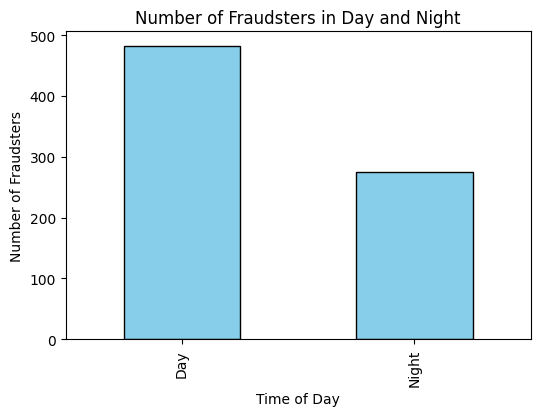

In [ ]:
# Create a new column indicating whether the time is day or night
users['TimeOfDay'] = users['CREATED_DATE'].astype(str).apply(lambda x: 1 if 6 <= int(x[11:13]) < 19 else 0)

# Count the number of fraudsters in the day and night
fraudsters_by_time = users.loc[users['fraudster'] == 1, 'TimeOfDay'].value_counts()

# Plot the distribution of fraudsters in day or night
plt.figure(figsize=(6, 4))
fraudsters_by_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudsters')
plt.title('Number of Fraudsters in Day and Night')
plt.xticks([0, 1], ['Day', 'Night'])
plt.show()

In [ ]:
transactions['TYPE'].value_counts()

TOPUP           590796
CARD_PAYMENT    289165
FEE              62300
EXCHANGE         51625
TRANSFER         35700
ATM              18989
Name: TYPE, dtype: int64

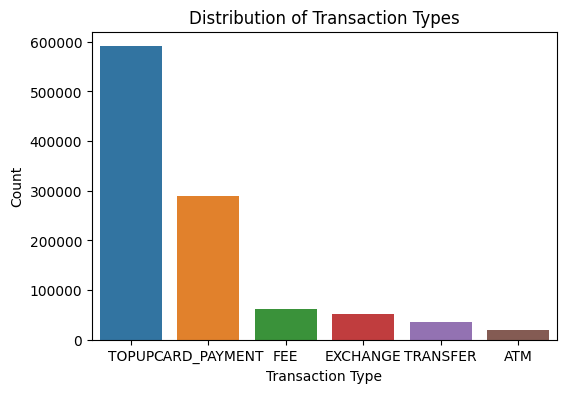

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=transactions['TYPE'].value_counts().index, y=transactions['TYPE'].value_counts().values)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


In [ ]:
transactions['STATE'].value_counts()

COMPLETED    685690
REVERTED     196931
FAILED       103920
DECLINED      62034
Name: STATE, dtype: int64

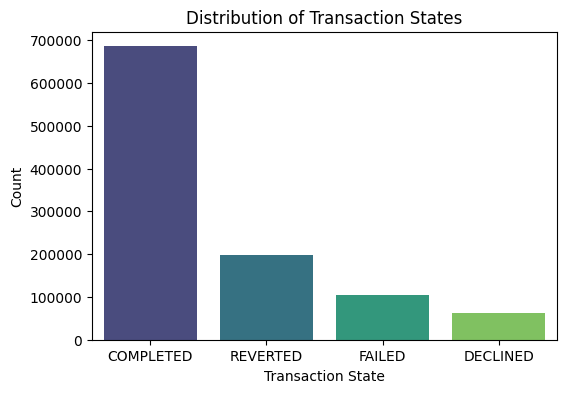

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=transactions['STATE'].value_counts().index, y=transactions['STATE'].value_counts().values, palette='viridis')
plt.title('Distribution of Transaction States')
plt.xlabel('Transaction State')
plt.ylabel('Count')
plt.show()

In [ ]:
transactions.value_counts()

ID                                    USER_ID                               CREATED_DATE             TYPE          STATE      AMOUNT_GBP  CURRENCY  fraudster
00000053-540d-48b9-9475-35b9b1eb32cc  f4fd8e36-ec17-4aef-91bb-1c7909c03912  2019-04-19 19:57:38.614  TOPUP         COMPLETED  9.44        RON       0            1
aa8b5509-868a-4d4c-9ab2-b8b9747638f0  e69fdc48-145f-4d52-aea9-bb9b966c1dc5  2019-05-01 20:02:08.971  FEE           COMPLETED  5.08        SEK       0            1
aa8a937a-10f9-4a0a-9db3-779b91b3d8f9  c8875fe3-3ff8-4725-a813-0c2069bb4ead  2019-05-12 06:11:36.933  CARD_PAYMENT  COMPLETED  7.20        EUR       0            1
aa8ac667-0517-4aaf-8c50-a184362b7d11  fbfe9c42-52ca-4b2c-91d9-c87a4bbe96cd  2019-04-30 11:28:54.675  TOPUP         COMPLETED  50.00       GBP       1            1
aa8acd26-6e8c-4dd7-ac44-0d6fe67d47e0  f303a2e8-4b7b-47ed-b7a5-cbdef5836a80  2019-04-15 13:52:17.459  TOPUP         COMPLETED  418.27      PLN       0            1
                           

# **Data PreProcessing**

---



In [ ]:
# Add user data to transactions where they are same
final_data = pd.merge(transactions, users,  right_on='ID', left_on='USER_ID', how='left', suffixes=('_transaction', '_user'))
# drop redundant columns
final_data = final_data.drop(['ID_user', 'fraudster_user'], axis=1)
# renaming columns to make sense of data
final_data = final_data.rename(columns={
    'age': 'USER_AGE',
    'fraudster_transaction': 'fraudster',
    'CREATED_DATE_transaction': 'T_CREATED_DATE',
    'CREATED_DATE_user': 'U_CREATED_DATE',
    'BIRTH_DATE': 'U_BIRTH_DATE',
    'AGE_GROUP': 'U_AGE_GROUP'
})
# reorder final data frame
final_data = final_data[['ID_transaction', 'USER_ID', 'COUNTRY', 'T_CREATED_DATE', 'TYPE', 'STATE', 'AMOUNT_GBP', 'CURRENCY',
                         'U_CREATED_DATE', 'U_BIRTH_DATE', 'USER_AGE', 'U_AGE_GROUP', 'TimeOfDay', 'fraudster']]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transactions['T_USER_ID'] = le.fit_transform(transactions['USER_ID'])
transactions['T_CREATED_DATE'] = le.fit_transform(transactions['CREATED_DATE'])
transactions['T_CURRENCY'] = le.fit_transform(transactions['CURRENCY'])
transactions['T_TYPE'] = le.fit_transform(transactions['TYPE'])
transactions['T_STATE'] = le.fit_transform(transactions['STATE'])

# Extract relevant features
X = transactions[['T_USER_ID','T_CREATED_DATE','AMOUNT_GBP', 'T_CURRENCY', 'T_TYPE', 'T_STATE']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_scaled, transactions['fraudster'], test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy of the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Feature Importance
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

#dropping unneccassary columns
dropping_col = ['T_USER_ID','T_CREATED_DATE','T_AMOUNT_GBP', 'T_CURRENCY', 'T_TYPE', 'T_STATE']
transactions = transactions.drop(columns=dropping_col, errors='ignore')


 Getting Public holidays from different API and websites

In [ ]:
import requests

no_data = []
# Function to get holidays for country
def country_holidays(country):
    # Using URL get all holidatys for country for year 2019
    api_url = f"https://date.nager.at/api/v3/publicholidays/2019/{country}"

    response = requests.get(api_url)
    # Check if the response is successful
    if response.status_code == 200:
        return response.json()
    else:
        # If the response is not successful, return an empty list
        no_data.append(country)
        return []

In [ ]:
# Extract unique countries
unique_countries = final_data['COUNTRY'].unique()
print(unique_countries)

# Get holidays for all unique countries
all_holidays = []
for country in unique_countries:
    holidays_data = country_holidays(country)
    all_holidays.extend([holiday['date'] for holiday in holidays_data])

# Convert to set for faster membership check
all_holidays_set = set(all_holidays)

final_data['T_CREATED_DATE_str'] = final_data['T_CREATED_DATE'].astype(str)

# Create a new column indicating whether T_CREATED_DATE is a bank holiday
final_data['is_bank_holiday'] = final_data['T_CREATED_DATE_str'].apply(lambda date: date.split()[0] in all_holidays_set)


# Drop the temporary column
final_data = final_data.drop('T_CREATED_DATE_str', axis=1)

['PL' 'RO' 'GB' 'FR' 'HU' 'BG' 'CZ' 'MT' 'BE' 'SE' 'IE' 'PT' 'ES' 'CH'
 'NO' 'HR' 'DE' 'CY' 'LV' 'IT' 'NL' 'SK' 'LT' 'GR' 'DK' 'JE' 'SI' 'RE'
 'AU' 'FI' 'EE' 'GP' 'GI' 'PF' 'IM' 'AT' 'GG' 'IS' 'MQ' 'LU' 'NC' 'YT'
 'KY' 'GL' 'BL' 'AW' 'SG' 'LI' 'BM' 'VG' 'GF' 'FK' 'CW' 'SX' 'MF' 'PM'
 'US']


In [ ]:
len(unique_countries)

In [ ]:
import holidays

# Dictionary to map country codes to prov values
country_prov_mapping = {
    'RE': 'RE',
    'GP': 'GP',
    'PF': 'PF',
    'MQ': 'MQ',
    'NC': 'NC',
    'YT': 'YT',
    'BL': 'BL',
    'MF': 'MF'
}

# Dictionary to store holidays for each country
all_holidays = {}

# Year for which you want to fetch holidays
year = 2019

# Fetch and store holidays for each country
for country, prov in country_prov_mapping.items():
    holidays_for_country = holidays.FRA(years=year, prov=prov)
    all_holidays[country] = list(holidays_for_country.keys())

# Update is_bank_holiday column based on the provided holidays
for country, holidays_list in all_holidays.items():
    for holiday_date in holidays_list:
        # Extract year, month, and day from the holiday date
        holiday_year, holiday_month, holiday_day = holiday_date.year, holiday_date.month, holiday_date.day

        # Filter rows where the country and month match the holiday
        matching_rows = final_data[
            (final_data['COUNTRY'] == country) &
            (final_data['T_CREATED_DATE'].dt.month == holiday_month) &
            (final_data['T_CREATED_DATE'].dt.day == holiday_day)
        ]

        # Set is_bank_holiday to 1 for matching rows
        final_data.loc[matching_rows.index, 'is_bank_holiday'] = 1


In [ ]:
additional_holidays_data = {
    'KY': ["2019-01-01","2019-01-28","2019-03-06","2019-04-19","2019-04-22","2019-05-20","2019-06-10","2019-07-01","2019-11-11","2019-12-25","2019-12-26",],
    'AW': ["2019-01-01","2019-01-25","2019-03-04","2019-03-18","2019-04-19","2019-04-22","2019-04-27","2019-05-03","2019-05-30","2019-12-25","2019-12-26",],
    'BM': ["2019-01-01","2019-04-19","2019-05-24","2019-08-01","2019-08-02","2019-09-02","2019-11-04","2019-11-11","2019-12-25","2019-12-26",],
    'VG': ["2019-01-01", "2019-03-04", "2019-03-11", "2019-04-19", "2019-04-22", "2019-06-07", "2019-06-10", "2019-07-01", "2019-08-05", "2019-08-06", "2019-08-07", "2019-10-21", "2019-12-11", "2019-12-25", "2019-12-26",],
    'GF': [ "2019-01-01", "2019-04-22", "2019-05-01", "2019-05-08", "2019-05-30", "2019-06-10", "2019-06-10", "2019-07-14", "2019-08-15", "2019-11-01", "2019-11-11", "2019-12-25",],
    'FK': [ "2019-01-01", "2019-04-19", "2019-04-21", "2019-04-22", "2019-06-14", "2019-10-07", "2019-12-08", "2019-12-09", "2019-12-25", "2019-12-26", "2019-12-27",],
    'CW': [ "2019-01-01", "2019-03-04", "2019-04-19", "2019-04-21", "2019-04-22", "2019-04-27", "2019-05-01", "2019-05-30", "2019-07-02", "2019-10-10", "2019-12-25", "2019-12-26", "2019-12-31",],
    'SX': [ "2019-01-01", "2019-04-19", "2019-04-21", "2019-04-22", "2019-04-27", "2019-04-30", "2019-05-01", "2019-05-30", "2019-06-09", "2019-07-01", "2019-10-14", "2019-11-11", "2019-12-25", "2019-12-26",],
    'PM': [ "2019-01-01", "2019-03-10", "2019-04-22", "2019-05-01", "2019-05-08", "2019-05-30", "2019-06-10", "2019-06-21", "2019-07-14", "2019-08-15", "2019-09-23", "2019-11-01", "2019-11-03", "2019-11-11", "2019-12-25", "2019-12-26", "2019-12-31",],
}

In [ ]:
# Update is_bank_holiday column based on the provided holidays
for country, holidays_list in additional_holidays_data.items():
  for holiday_date in holidays_list:
        # Filter rows where the country and month match the holiday
        matching_rows = final_data[
            (final_data['COUNTRY'] == country) &
            (final_data['T_CREATED_DATE'].dt.month == holiday_date[5:7]) &
            (final_data['T_CREATED_DATE'].dt.day == holiday_date[8:10])
        ]

        # Set is_bank_holiday to 1 for matching rows
        final_data.loc[matching_rows.index, 'is_bank_holiday'] = 1

In [ ]:
bank_holiday_transactions = final_data[final_data['is_bank_holiday'] == 1]
# Get the count of transactions on bank holidays
num_bank_holiday_transactions = len(bank_holiday_transactions)

# Print the result
print(f"Number of transactions on bank holidays: {num_bank_holiday_transactions}")


Number of transactions on bank holidays: 607089


In [ ]:
import pytz

# check time in which fraudsters are mostly active according to their time
fraudsters_time = final_data.loc[final_data['fraudster'] == 1, 'T_CREATED_DATE'].dt.hour
labels = [str(i) for i in range(24)]

# Converting to UTC time
final_data['T_CREATED_DATE_GB'] = final_data['T_CREATED_DATE'].dt.tz_localize('UTC').dt.tz_convert('Europe/London')

# Extract the hour of the day according to server time
final_data['hour_of_day_GB'] = final_data['T_CREATED_DATE_GB'].dt.hour
# Assuming 'hour_of_day_GB' is in datetime format

fraudsters_time_1 = final_data.loc[final_data['fraudster'] == 1, 'hour_of_day_GB']
labels = [str(i) for i in range(24)]

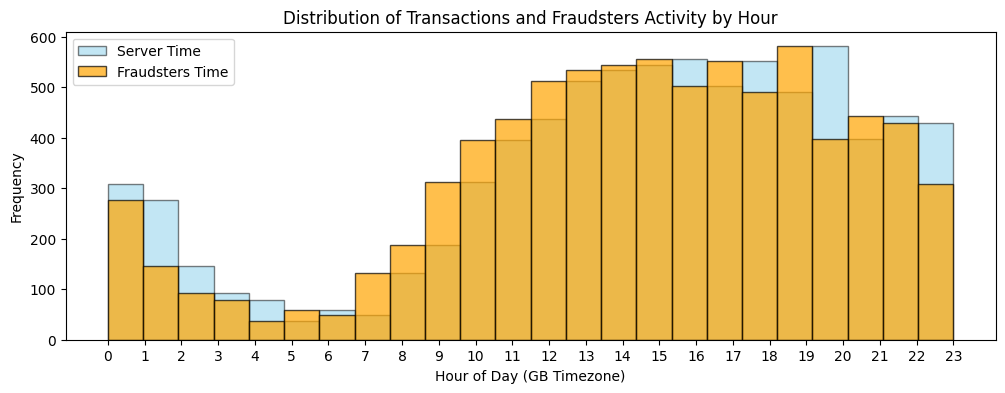

In [ ]:
# Create a figure
plt.figure(figsize=(12, 4))

# Plot the histogram for all transactions
plt.hist(fraudsters_time_1, bins=24, color='skyblue', edgecolor='black', alpha=0.5, label='Server Time')

# Plot the histogram for fraudsters
plt.hist(fraudsters_time, bins=24, color='orange', edgecolor='black', alpha=0.7, label='Fraudsters Time')

plt.xlabel('Hour of Day (GB Timezone)')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions and Fraudsters Activity by Hour')
plt.xticks(range(24))
plt.legend()

# Show the plot
plt.show()

Checking unique months for Transactions

In [ ]:
# Convert 'T_CREATED_DATE' to datetime if it's not already
final_data['T_CREATED_DATE'] = pd.to_datetime(final_data['T_CREATED_DATE'])

# Add a new column 'quarter'
final_data['quarter'] = final_data['T_CREATED_DATE'].dt.quarter

# Assuming T_CREATED_DATE is a datetime column
final_data['month'] = final_data['T_CREATED_DATE'].dt.month

# Display unique months
unique_months = final_data['month'].unique()
print(unique_months)

final_data.drop('month', axis = 1)

[4 5]


,ID_transaction,USER_ID,COUNTRY,T_CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY,U_CREATED_DATE,U_BIRTH_DATE,USER_AGE,U_AGE_GROUP,TimeOfDay,fraudster,is_bank_holiday,T_CREATED_DATE_GB,hour_of_day_GB,quarter
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,PL,2019-04-20 18:04:03.930,CARD_PAYMENT,COMPLETED,13.12,PLN,2019-04-18 10:59:26.974,1959-04-08,64.0,60-69,1,0,True,2019-04-20 19:04:03.930000+01:00,19,2
1,2ae18b8b-b9bc-4c44-96b1-d43efd8d371d,3979518e-95f7-4b6c-81ae-2f828727d81a,RO,2019-05-03 13:09:57.625,TOPUP,REVERTED,0.01,RON,2019-05-03 13:03:46.883,1993-08-12,30.0,30-39,1,0,True,2019-05-03 14:09:57.625000+01:00,14,2
2,0162d352-dd18-40ab-b3ee-cf6584c9a238,75aa5388-9c89-4f72-bc54-67501519585b,GB,2019-04-25 15:37:46.837,TOPUP,COMPLETED,10.00,GBP,2019-04-25 15:31:00.259,1988-04-21,35.0,30-39,1,0,True,2019-04-25 16:37:46.837000+01:00,16,2
3,a4e176f7-49ca-462b-9164-2f0645622148,45598164-6362-4ee4-bd70-ffee3bd1d707,GB,2019-04-28 13:52:15.256,EXCHANGE,COMPLETED,0.11,RON,2019-04-28 13:39:18.9,1997-01-13,26.0,20-29,1,0,True,2019-04-28 14:52:15.256000+01:00,14,2
4,f6f9135f-fb2b-4a58-bb65-dd9713306a71,5a501ce5-f03c-410d-aabc-434b2cad741d,GB,2019-05-13 16:02:12.081,CARD_PAYMENT,COMPLETED,9.79,EUR,2019-05-03 10:38:55.607,1999-07-22,24.0,20-29,1,0,False,2019-05-13 17:02:12.081000+01:00,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,70211059-ac90-45d9-999f-fada1726ba86,c510e9d9-1e0e-4868-8d3b-2c5f665887ac,GB,2019-05-10 14:58:01.938,CARD_PAYMENT,COMPLETED,11.15,EUR,2019-04-30 16:39:18.518,1992-09-02,31.0,30-39,1,0,False,2019-05-10 15:58:01.938000+01:00,15,2
1048571,677822c1-d57c-4500-884c-843bf1a0a4b7,d21b20b5-1bab-4720-b455-7134a8d30b94,IE,2019-04-22 18:37:57.300,ATM,COMPLETED,67.47,TRY,2019-04-10 17:38:45.233,1990-05-14,33.0,30-39,1,0,True,2019-04-22 19:37:57.300000+01:00,19,2
1048572,ea364fc6-7492-4bdb-90f1-9a450a01feab,6891b86f-66de-43b5-bdf7-4a7c316b5223,CH,2019-05-02 19:16:11.917,TOPUP,COMPLETED,8.01,CHF,2019-05-02 19:14:17.137,1995-09-16,28.0,20-29,0,0,True,2019-05-02 20:16:11.917000+01:00,20,2
1048573,b3a341b2-8fe3-4350-826c-0404cc6bc882,9f4fcd8d-eaf8-4bcd-b34a-9625203221ce,IE,2019-05-04 19:25:48.549,CARD_PAYMENT,COMPLETED,7.70,GBP,2019-04-25 13:21:38.637,1991-10-29,32.0,30-39,1,0,True,2019-05-04 20:25:48.549000+01:00,20,2


Check how many transactions user made in different currenices

In [ ]:
final_data['CURRENCIES'] = final_data.groupby('USER_ID')['CURRENCY'].apply(lambda x: (~pd.Series(x).duplicated()).cumsum())

<ipython-input-43-707947fde458>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  final_data['CURRENCIES'] = final_data.groupby('USER_ID')['CURRENCY'].apply(lambda x: (~pd.Series(x).duplicated()).cumsum())


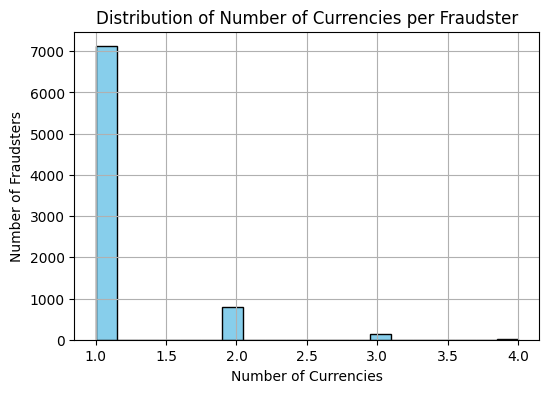

In [ ]:
# Filter data for fraudsters
fraudsters_data = final_data[final_data['fraudster'] == 1]

# Plot histogram of the number of currencies per fraudster
plt.figure(figsize=(6, 4))
fraudsters_data['CURRENCIES'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Currencies per Fraudster')
plt.xlabel('Number of Currencies')
plt.ylabel('Number of Fraudsters')
plt.show()


**Feature Engineering for more columns to study finances**

In [ ]:
#Getting Transaction Date
final_data['T_CREATED_DATE_DAY'] = final_data['T_CREATED_DATE'].dt.day

# Create features related to the number and sum of transactions for each user
final_data['TRANSACTION_NO'] = final_data.groupby(['USER_ID'], as_index=False)['ID_transaction'].cumcount() + 1
final_data['TRANSACTION_DAY_NO'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['ID_transaction'].cumcount() + 1
final_data['TRANSACTION_SUM'] = final_data.groupby(['USER_ID'], as_index=False)['AMOUNT_GBP'].cumsum()
final_data['TRANSACTION_DAY_SUM'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['AMOUNT_GBP'].cumsum()

# Create features for other transaction types
transaction_types = ['TOPUP', 'CARD_PAYMENT', 'FEE', 'EXCHANGE', 'TRANSFER', 'ATM']
for transaction_type in transaction_types:
    final_data[f'{transaction_type}_NO'] = final_data.groupby(['USER_ID'], as_index=False)['ID_transaction'].cumcount() + 1
    final_data[f'{transaction_type}_DAY_NO'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['ID_transaction'].cumcount() + 1
    final_data[f'{transaction_type}_SUM'] = final_data.groupby(['USER_ID'], as_index=False)['AMOUNT_GBP'].cumsum()
    final_data[f'{transaction_type}_DAY_SUM'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['AMOUNT_GBP'].cumsum()

# Create features for transaction states
transaction_states = ['COMPLETED', 'REVERTED', 'FAILED', 'DECLINED']
for transaction_state in transaction_states:
    final_data[f'{transaction_state}_NO'] = final_data.groupby(['USER_ID'], as_index=False)['ID_transaction'].cumcount() + 1
    final_data[f'{transaction_state}_DAY_NO'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['ID_transaction'].cumcount() + 1
    final_data[f'{transaction_state}_SUM'] = final_data.groupby(['USER_ID'], as_index=False)['AMOUNT_GBP'].cumsum()
    final_data[f'{transaction_state}_DAY_SUM'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_DAY'], as_index=False)['AMOUNT_GBP'].cumsum()

# Print the updated columns
print(final_data.columns)


Index(['ID_transaction', 'USER_ID', 'COUNTRY', 'T_CREATED_DATE', 'TYPE',
       'STATE', 'AMOUNT_GBP', 'CURRENCY', 'U_CREATED_DATE', 'U_BIRTH_DATE',
       'USER_AGE', 'U_AGE_GROUP', 'TimeOfDay', 'fraudster', 'is_bank_holiday',
       'T_CREATED_DATE_GB', 'hour_of_day_GB', 'quarter', 'month', 'CURRENCIES',
       'T_CREATED_DATE_DAY', 'TRANSACTION_NO', 'TRANSACTION_DAY_NO',
       'TRANSACTION_SUM', 'TRANSACTION_DAY_SUM', 'TOPUP_NO', 'TOPUP_DAY_NO',
       'TOPUP_SUM', 'TOPUP_DAY_SUM', 'CARD_PAYMENT_NO', 'CARD_PAYMENT_DAY_NO',
       'CARD_PAYMENT_SUM', 'CARD_PAYMENT_DAY_SUM', 'FEE_NO', 'FEE_DAY_NO',
       'FEE_SUM', 'FEE_DAY_SUM', 'EXCHANGE_NO', 'EXCHANGE_DAY_NO',
       'EXCHANGE_SUM', 'EXCHANGE_DAY_SUM', 'TRANSFER_NO', 'TRANSFER_DAY_NO',
       'TRANSFER_SUM', 'TRANSFER_DAY_SUM', 'ATM_NO', 'ATM_DAY_NO', 'ATM_SUM',
       'ATM_DAY_SUM', 'COMPLETED_NO', 'COMPLETED_DAY_NO', 'COMPLETED_SUM',
       'COMPLETED_DAY_SUM', 'REVERTED_NO', 'REVERTED_DAY_NO', 'REVERTED_SUM',
       'REVERTED_

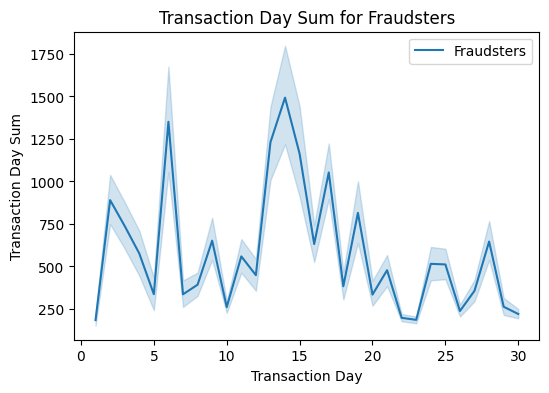

In [ ]:
fraudsters_data = final_data[final_data['fraudster'] == 1]

plt.figure(figsize=(6, 4))
sns.lineplot(x='T_CREATED_DATE_DAY', y='TRANSACTION_DAY_SUM', data=fraudsters_data, label='Fraudsters')
plt.title('Transaction Day Sum for Fraudsters')
plt.xlabel('Transaction Day')
plt.ylabel('Transaction Day Sum')
plt.legend()
plt.show()


Creating Columns like One Hot Encoding for transaction state and type

In [ ]:
# Calculate the difference between the creation date of the transaction and the user's birthdate
final_data['AGE_AT_TRANSACTION'] = (final_data['T_CREATED_DATE'] - final_data['U_BIRTH_DATE']).dt.days

# Create binary columns indicating whether the transaction type is present
for transaction_type in transaction_types:
    final_data[f'IS_{transaction_type}'] = (final_data['TYPE'] == transaction_type).astype(int)

# Create binary columns indicating whether the transaction state is present
for transaction_state in transaction_states:
    final_data[f'IS_{transaction_state}'] = (final_data['STATE'] == transaction_state).astype(int)

# Create binary columns indicating whether the transaction is during the day or night
final_data['IS_DAY'] = (final_data['TimeOfDay'] == 'Day').astype(int)

# Create binary columns indicating whether the user is a fraudster
final_data['IS_FRAUDSTER'] = final_data['fraudster']

# Calculate the transaction amount in logarithmic scale
final_data['LOG_AMOUNT_GBP'] = final_data['AMOUNT_GBP'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Drop unnecessary columns
final_data.drop(columns=['U_CREATED_DATE', 'U_BIRTH_DATE', 'T_CREATED_DATE'], inplace=True)

# Print the updated columns
print(final_data.columns)


Index(['ID_transaction', 'USER_ID', 'COUNTRY', 'TYPE', 'STATE', 'AMOUNT_GBP',
       'CURRENCY', 'USER_AGE', 'U_AGE_GROUP', 'TimeOfDay', 'fraudster',
       'is_bank_holiday', 'T_CREATED_DATE_GB', 'hour_of_day_GB', 'quarter',
       'month', 'CURRENCIES', 'T_CREATED_DATE_DAY', 'TRANSACTION_NO',
       'TRANSACTION_DAY_NO', 'TRANSACTION_SUM', 'TRANSACTION_DAY_SUM',
       'TOPUP_NO', 'TOPUP_DAY_NO', 'TOPUP_SUM', 'TOPUP_DAY_SUM',
       'CARD_PAYMENT_NO', 'CARD_PAYMENT_DAY_NO', 'CARD_PAYMENT_SUM',
       'CARD_PAYMENT_DAY_SUM', 'FEE_NO', 'FEE_DAY_NO', 'FEE_SUM',
       'FEE_DAY_SUM', 'EXCHANGE_NO', 'EXCHANGE_DAY_NO', 'EXCHANGE_SUM',
       'EXCHANGE_DAY_SUM', 'TRANSFER_NO', 'TRANSFER_DAY_NO', 'TRANSFER_SUM',
       'TRANSFER_DAY_SUM', 'ATM_NO', 'ATM_DAY_NO', 'ATM_SUM', 'ATM_DAY_SUM',
       'COMPLETED_NO', 'COMPLETED_DAY_NO', 'COMPLETED_SUM',
       'COMPLETED_DAY_SUM', 'REVERTED_NO', 'REVERTED_DAY_NO', 'REVERTED_SUM',
       'REVERTED_DAY_SUM', 'FAILED_NO', 'FAILED_DAY_NO', 'FAILED_SUM'

Calculating Balance and Finances of transactions by users

In [ ]:
# Create 'MONEY_IN_GBP' column
final_data['MONEY_IN_GBP'] = ((final_data['STATE'] == 'COMPLETED') & (final_data['TYPE'] == 'TOPUP')).astype(int) * final_data['AMOUNT_GBP']

# Create 'MONEY_OUT_GBP' column
final_data['MONEY_OUT_GBP'] = ((final_data['STATE'] == 'COMPLETED') & (final_data['TYPE'].isin(['CARD_PAYMENT', 'TRANSFER', 'ATM', 'FEE']))).astype(int) * final_data['AMOUNT_GBP']


In [ ]:
# Create 'MONEY_IN_ONE' column
final_data['MONEY_IN_ONE'] = ((final_data['STATE'] == 'COMPLETED') & (final_data['TYPE'] == 'TOPUP')).astype(int)

# Create 'MONEY_OUT_ONE' column
final_data['MONEY_OUT_ONE'] = ((final_data['STATE'] == 'COMPLETED') & (final_data['TYPE'].apply(lambda x: x in ['CARD_PAYMENT', 'TRANSFER', 'ATM', 'FEE']))).astype(int)

# Create cumulative sum columns
final_data['MONEY_IN_NO'] = final_data.groupby(['USER_ID'])['MONEY_IN_ONE'].cumsum()
final_data['MONEY_IN_DAY_NO'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_GB'])['MONEY_IN_ONE'].cumsum()
final_data['MONEY_IN_SUM'] = final_data.groupby(['USER_ID'])['MONEY_IN_GBP'].cumsum()
final_data['MONEY_IN_DAY_SUM'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_GB'])['MONEY_IN_GBP'].cumsum()

final_data['MONEY_OUT_NO'] = final_data.groupby(['USER_ID'])['MONEY_OUT_ONE'].cumsum()
final_data['MONEY_OUT_DAY_NO'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_GB'])['MONEY_OUT_ONE'].cumsum()
final_data['MONEY_OUT_SUM'] = final_data.groupby(['USER_ID'])['MONEY_OUT_GBP'].cumsum()
final_data['MONEY_OUT_DAY_SUM'] = final_data.groupby(['USER_ID', 'T_CREATED_DATE_GB'])['MONEY_OUT_GBP'].cumsum()

In [ ]:
# Calculate balance columns
final_data['BALANCE_NO'] = final_data['MONEY_IN_NO'] - final_data['MONEY_OUT_NO']
final_data['BALANCE_DAY_NO'] = final_data['MONEY_IN_DAY_NO'] - final_data['MONEY_OUT_DAY_NO']
final_data['BALANCE_SUM'] = final_data['MONEY_IN_SUM'] - final_data['MONEY_OUT_SUM']
final_data['BALANCE_DAY_SUM'] = final_data['MONEY_IN_DAY_SUM'] - final_data['MONEY_OUT_DAY_SUM']

In [ ]:
#Calculating Balance after transaction
final_data['BALANCE']=(final_data['MONEY_IN_SUM']-final_data['MONEY_OUT_SUM']).astype(float)

In [ ]:

# Print the updated columns
print(final_data.columns)
final_data.shape

Index(['ID_transaction', 'USER_ID', 'COUNTRY', 'TYPE', 'STATE', 'AMOUNT_GBP',
       'CURRENCY', 'USER_AGE', 'U_AGE_GROUP', 'TimeOfDay', 'fraudster',
       'is_bank_holiday', 'T_CREATED_DATE_GB', 'hour_of_day_GB', 'quarter',
       'month', 'CURRENCIES', 'T_CREATED_DATE_DAY', 'TRANSACTION_NO',
       'TRANSACTION_DAY_NO', 'TRANSACTION_SUM', 'TRANSACTION_DAY_SUM',
       'TOPUP_NO', 'TOPUP_DAY_NO', 'TOPUP_SUM', 'TOPUP_DAY_SUM',
       'CARD_PAYMENT_NO', 'CARD_PAYMENT_DAY_NO', 'CARD_PAYMENT_SUM',
       'CARD_PAYMENT_DAY_SUM', 'FEE_NO', 'FEE_DAY_NO', 'FEE_SUM',
       'FEE_DAY_SUM', 'EXCHANGE_NO', 'EXCHANGE_DAY_NO', 'EXCHANGE_SUM',
       'EXCHANGE_DAY_SUM', 'TRANSFER_NO', 'TRANSFER_DAY_NO', 'TRANSFER_SUM',
       'TRANSFER_DAY_SUM', 'ATM_NO', 'ATM_DAY_NO', 'ATM_SUM', 'ATM_DAY_SUM',
       'COMPLETED_NO', 'COMPLETED_DAY_NO', 'COMPLETED_SUM',
       'COMPLETED_DAY_SUM', 'REVERTED_NO', 'REVERTED_DAY_NO', 'REVERTED_SUM',
       'REVERTED_DAY_SUM', 'FAILED_NO', 'FAILED_DAY_NO', 'FAILED_SUM'

(1048575, 93)

**Cleaning Data and Unneccesary columns**

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 93 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID_transaction        1048575 non-null  int64  
 1   USER_ID               1048575 non-null  int64  
 2   COUNTRY               1048575 non-null  int64  
 3   TYPE                  1048575 non-null  int64  
 4   STATE                 1048575 non-null  int64  
 5   AMOUNT_GBP            1048575 non-null  float64
 6   CURRENCY              1048575 non-null  int64  
 7   USER_AGE              1048575 non-null  float64
 8   U_AGE_GROUP           1048575 non-null  int64  
 9   fraudster             1048575 non-null  int64  
 10  is_bank_holiday       1048575 non-null  object 
 11  hour_of_day_GB        1048575 non-null  int64  
 12  month                 1048575 non-null  int64  
 13  CURRENCIES            1048575 non-null  int64  
 14  T_CREATED_DATE_DAY    1048575 non-

In [ ]:
# Check for constant columns
constant_columns = final_data.columns[final_data.nunique() == 1]
print("Constant Columns:", constant_columns)


In [ ]:
final_data = final_data.drop(['quarter', 'IS_DAY'], axis = 1) #constant columns dropped

In [ ]:
# Check for duplicate columns
duplicate_columns = final_data.columns[final_data.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)


In [ ]:
final_data = final_data.drop(['TimeOfDay'], axis = 1) #constant columns dropped

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder objects
le_user_id = LabelEncoder()
le_transaction_id = LabelEncoder()
le_type = LabelEncoder()
le_state = LabelEncoder()
le_country = LabelEncoder()
le_age_group = LabelEncoder()
le_currency = LabelEncoder()

# Fit and transform each column
final_data['USER_ID'] = le_user_id.fit_transform(final_data['USER_ID'])
final_data['ID_transaction'] = le_transaction_id.fit_transform(final_data['ID_transaction'])
final_data['TYPE'] = le_type.fit_transform(final_data['TYPE'])
final_data['STATE'] = le_state.fit_transform(final_data['STATE'])
final_data['COUNTRY'] = le_country.fit_transform(final_data['COUNTRY'])
final_data['U_AGE_GROUP'] = le_age_group.fit_transform(final_data['U_AGE_GROUP'])
final_data['CURRENCY'] = le_currency.fit_transform(final_data['CURRENCY'])

# Save each LabelEncoder separately
joblib.dump(le_user_id, 'user_id_label_encoder.joblib')
joblib.dump(le_transaction_id, 'transaction_id_label_encoder.joblib')
joblib.dump(le_type, 'type_label_encoder.joblib')
joblib.dump(le_state, 'state_label_encoder.joblib')
joblib.dump(le_country, 'country_label_encoder.joblib')
joblib.dump(le_age_group, 'age_group_label_encoder.joblib')
joblib.dump(le_currency, 'currency_label_encoder.joblib')

['currency_label_encoder.joblib']

In [ ]:
# Extract relevant information from datetime column
final_data['year_GB'] = final_data['T_CREATED_DATE_GB'].dt.year
final_data['month_GB'] = final_data['T_CREATED_DATE_GB'].dt.month
final_data['day_GB'] = final_data['T_CREATED_DATE_GB'].dt.day
final_data['hour_GB'] = final_data['T_CREATED_DATE_GB'].dt.hour

# Drop the original datetime column
final_data.drop(columns=['T_CREATED_DATE_GB'], inplace=True)



In [ ]:
print(final_data.shape)
final_data.to_csv('output.csv', index=False)
